In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

x, y = make_moons(1000, noise=0.1)
x, y = torch.tensor(x, dtype=torch.float), torch.tensor(y, dtype=torch.float)

def to_np(x):
    return x.cpu().detach().numpy()

In [3]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()

        self.activation = nn.ReLU()

        self.l1 = nn.Linear(2, 3)
        self.out = nn.Linear(3, 1)

    def forward(self, x):

        layer1 = torch.tanh(self.l1(x))
        out = torch.sigmoid(self.out(layer1).squeeze())

        return out, layer1

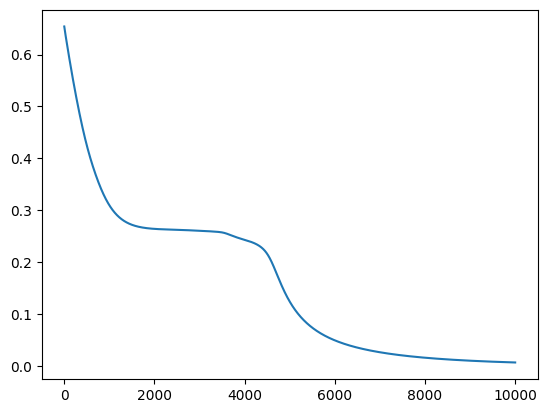

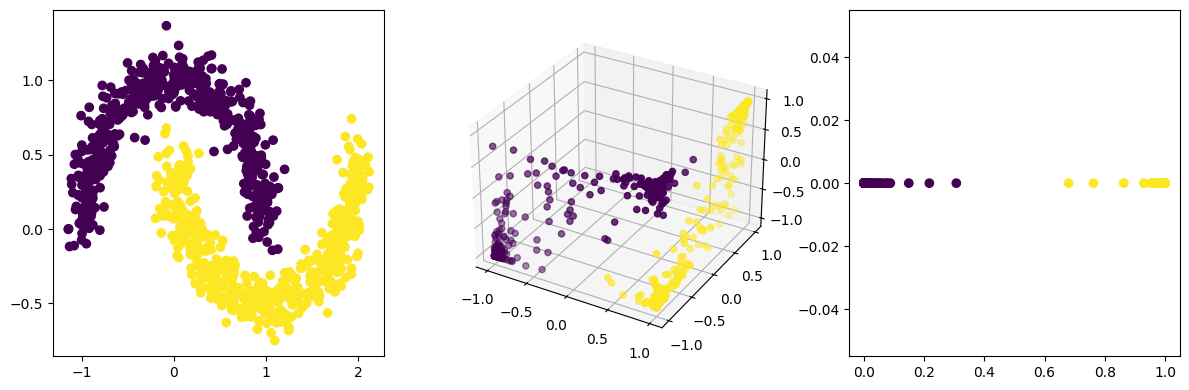

In [4]:
EPOCHS = 10000
criterion = nn.BCELoss()

model = MLP()
optimizer = torch.optim.Adam(model.parameters())
losses = []

for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()

    out, h = model(x)
    loss = criterion(out, y)
    loss.backward()
    losses.append(loss.item())
    optimizer.step()

    optimizer.zero_grad()

plt.figure(1)
plt.plot(losses)
plt.show()

fig = plt.figure(2, figsize=(12,4))
ax1 = fig.add_subplot(131)
ax1.scatter(x[:, 0], x[:, 1], c=y)
#ax1.axis('off')
ax2 = fig.add_subplot(132, projection = '3d')
#ax2.axis('off')
ax2.scatter(to_np(h[:, 0]), to_np(h[:, 1]), to_np(h[:, 2]), c=y)
ax4 = fig.add_subplot(133)
ax4.scatter(to_np(out), torch.zeros_like(out), c=y)
#ax4.axis('off')
plt.tight_layout()
#plt.savefig('two-dims-example.svg')
plt.show()

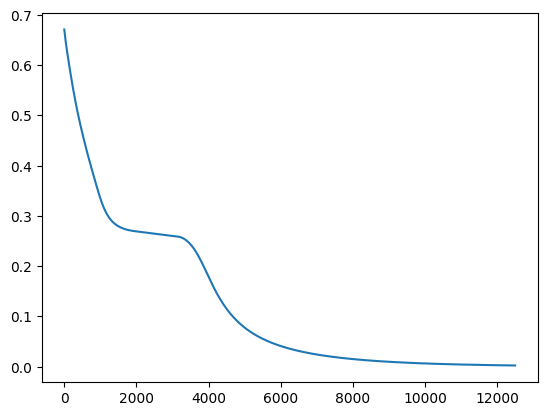

In [5]:
EPOCHS = 12500
save_per_epochs = 50
criterion = nn.BCELoss()

model = MLP()
optimizer = torch.optim.Adam(model.parameters())
losses = []

for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()

    out, h = model(x)
    loss = criterion(out, y)
    loss.backward()
    losses.append(loss.item())
    optimizer.step()

    optimizer.zero_grad()

    if epoch % save_per_epochs == 0:
      fig = plt.figure(1, figsize=(12,4))
      ax1 = fig.add_subplot(131)
      ax1.scatter(x[:, 0], x[:, 1], c=y)
      ax1.set_xticks([])
      ax1.set_yticks([])
      ax1.set_title('Input layer')
      ax2 = fig.add_subplot(132, projection = '3d')
      ax2.set_xticks([])
      ax2.set_yticks([])
      ax2.set_zticks([])
      ax2.set_title('Hidden layer')
      ax2.scatter(to_np(h[:, 0]), to_np(h[:, 1]), to_np(h[:, 2]), c=y)
      ax4 = fig.add_subplot(133)
      ax4.scatter(to_np(out), torch.zeros_like(out), c=y)
      ax4.set_xticks([])
      ax4.set_yticks([])
      ax4.set_title('Output layer')
      plt.tight_layout()
      plt.savefig(''.join([str(epoch), '.png']), transparent=True)
      plt.close()

plt.figure(1)
plt.plot(losses)
plt.show()

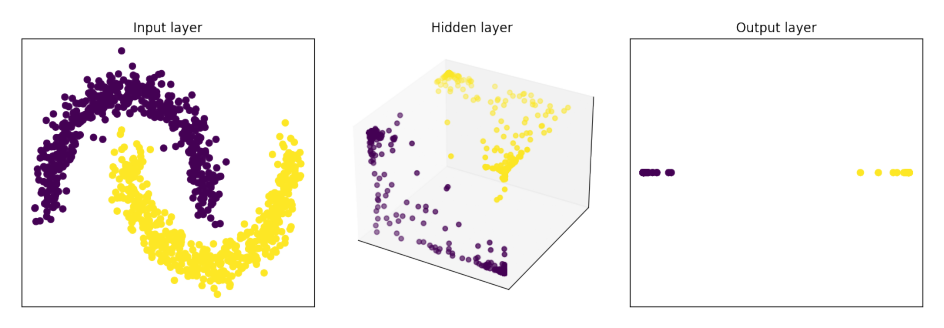

In [6]:
import matplotlib.cm as cm
import matplotlib.animation as animation
import numpy as np

frames = [] # for storing the generated images
fig = plt.figure(figsize=(12,4))
for epoch in range(0, EPOCHS, save_per_epochs):
    plt.axis('off')
    frames.append([plt.imshow(plt.imread(f"{epoch}.png"), animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=150, blit=True, repeat=False)
ani.save('movie.mp4')
plt.show()